# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_sparc4acs3_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_s4c3_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_s4c3_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:36.946000,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:38.066073,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:39.186146,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:40.306219,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:41.426291,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:01:58.221000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L4,None,True
1549,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:03:40.743000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,2,L4,None,True
1550,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:05:23.149000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,3,L4,None,True
1551,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:07:05.750000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,4,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   106R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   106R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   106R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   106R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   106R x 13C   [I11, D2

Then we plot the science frame using the `sparc4.product_plots` library

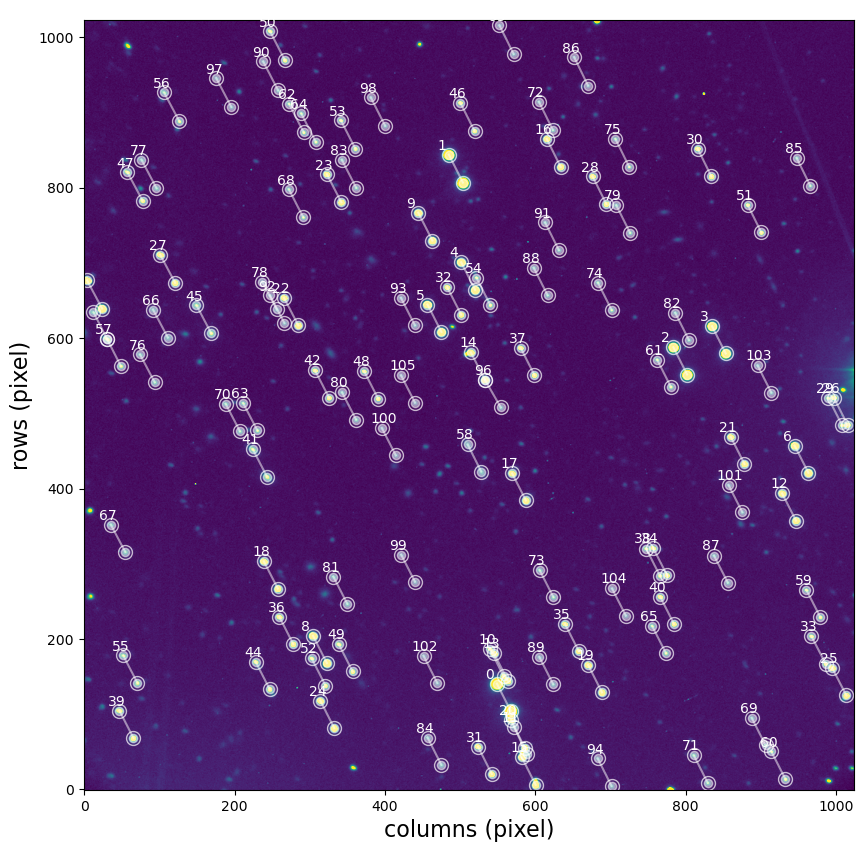

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553393,-38.759436,567.258390,104.343827,5.180812,5.180812,-10.826044,0.000826,-9.041134,0.000705,10,0
1,1,189.564825,-38.693855,503.695673,806.925816,4.781453,4.781453,-10.396479,0.001046,-9.023218,0.000627,10,0
2,2,189.527289,-38.716338,801.874796,551.676073,4.806340,4.806340,-10.128664,0.001233,-9.029072,0.000735,10,0
3,3,189.521214,-38.713447,853.198479,579.656393,4.763036,4.763036,-9.779473,0.001531,-9.030922,0.000728,10,0
4,4,189.562083,-38.707187,519.968078,664.273443,4.751254,4.751254,-9.107272,0.002368,-9.023334,0.000585,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,189.517439,-38.733125,875.284991,368.572148,1.248920,1.248920,-4.962930,0.080797,-9.035143,0.000709,10,0
102,102,189.565419,-38.756462,469.592843,141.434364,5.113970,5.113970,-5.007817,0.075806,-9.036468,0.000581,10,0
103,103,189.513595,-38.718021,913.780944,527.634520,4.438020,4.438020,-5.073568,0.073657,-9.040362,0.000738,10,0
104,104,189.535494,-38.746802,720.299284,231.088984,4.927098,4.927098,-4.953905,0.079518,-9.033399,0.000582,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

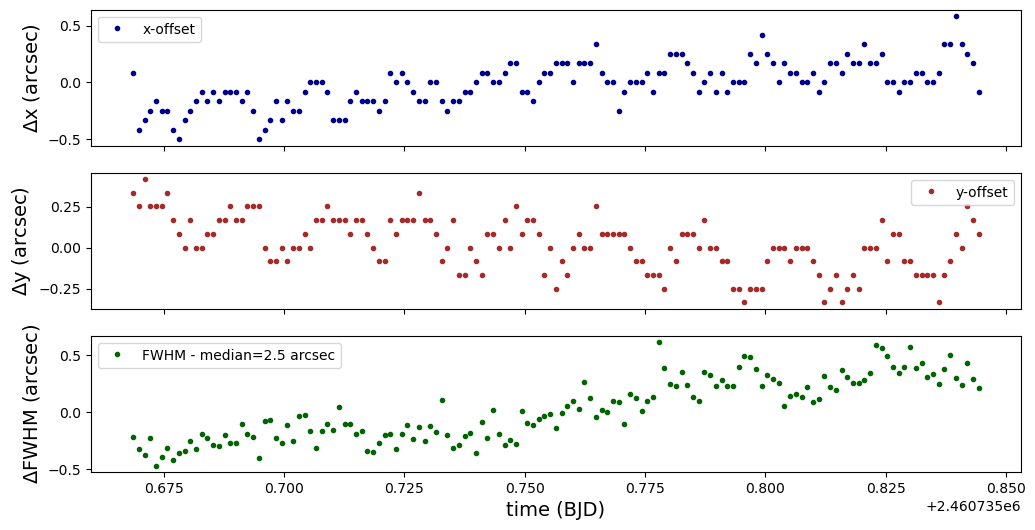

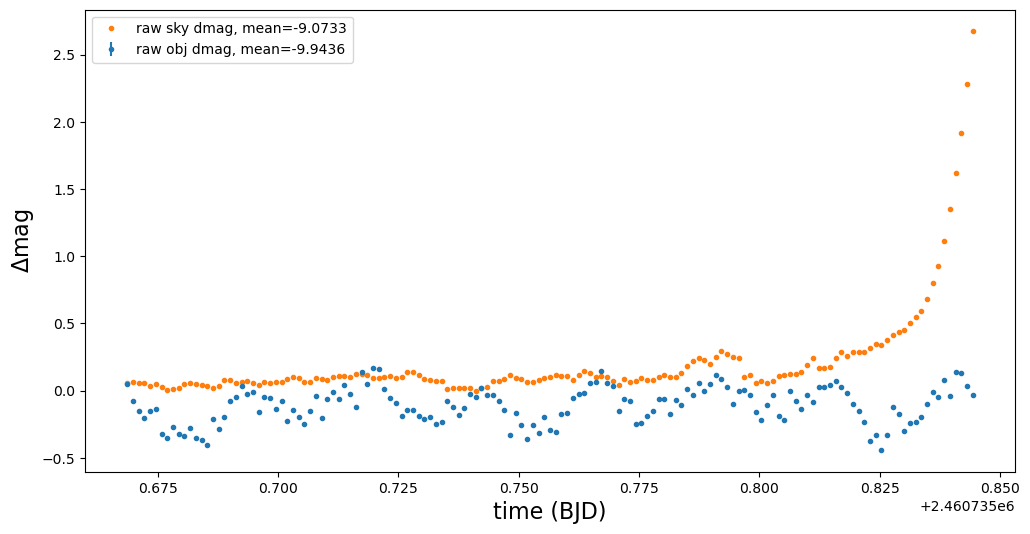

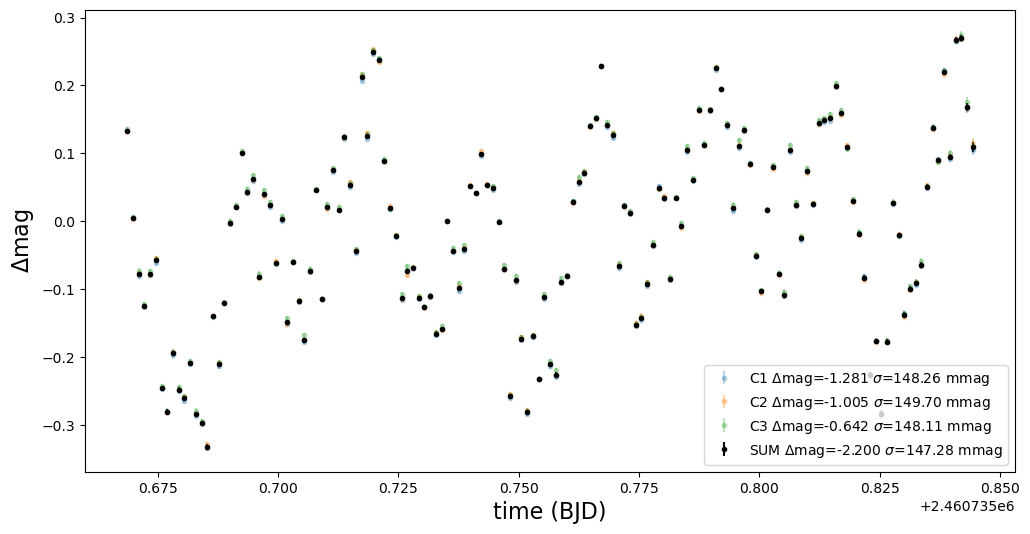

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
 2460735.668687272 465.8499615886969 ...   0.13359427644927457
 2460735.669872588 464.3499615886969 ...  0.004928030881034218
2460735.6710601617 464.5999615886969 ...  -0.07713292889615708
2460735.6722443667 464.8499615886969 ...   -0.1249177022473944
2460735.6734285015 465.0999615886969 ...  -0.07741404121002482
2460735.6746140723 464.8499615886969 ... -0.057478809664402775
2460735.6757996897 464.8499615886969 ...  -0.24548645393287138
               ...               ... ...                   ...
2460735.8371981364 466.5999615886969 ...   0.08956303076069538
2460735.8383856732 466.5999615886969 ...   0.21987951325557908
2460735.8395719025 467.3499615886969 ...   0.09478691371164416
2460735.8407585714 466.5999615886969 ...   0.26664283445023074
 2460735.841943898 466.3499615886969 ...     0.270004186118161
 2460735.843131481 466.0999615886969 ...   0.1685514024

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=5
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     921   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1274   106R x 631C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D,

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0146', 'EFE0146', 'FO0147', 'EFO0147', 'FE0147', 'EFE0147', 'FO0148',
       'EFO0148', 'FE0148', 'EFE0148'],
      dtype='object', length=631)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:55:33,433 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:55:33,433 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:55:33,446 root - INFO - Source index: i=5   [pipeline_lib]


2025-09-18 00:55:33,446 | INFO | Source index: i=5 


2025-09-18 00:55:33,447 root - INFO - Source RA=189.56722313149572 Dec=-38.71267883406689 mag=-15.4129+-0.0003  [pipeline_lib]


2025-09-18 00:55:33,447 | INFO | Source RA=189.56722313149572 Dec=-38.71267883406689 mag=-15.4129+-0.0003


2025-09-18 00:55:33,447 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-18 00:55:33,447 | INFO | Best aperture radius: 15.0 pixels


2025-09-18 00:55:33,448 root - INFO - Polarization in Q: -0.0053+-0.0006  [pipeline_lib]


2025-09-18 00:55:33,448 | INFO | Polarization in Q: -0.0053+-0.0006


2025-09-18 00:55:33,449 root - INFO - Polarization in U: 0.000+-0.001  [pipeline_lib]


2025-09-18 00:55:33,449 | INFO | Polarization in U: 0.000+-0.001


2025-09-18 00:55:33,450 root - INFO - Polarization in V: 0.0010+-0.0005  [pipeline_lib]


2025-09-18 00:55:33,450 | INFO | Polarization in V: 0.0010+-0.0005


2025-09-18 00:55:33,451 root - INFO - Total linear polarization p: 0.0053+-0.0006  [pipeline_lib]


2025-09-18 00:55:33,451 | INFO | Total linear polarization p: 0.0053+-0.0006


2025-09-18 00:55:33,452 root - INFO - Angle of polarization theta: 88+-3 deg  [pipeline_lib]


2025-09-18 00:55:33,452 | INFO | Angle of polarization theta: 88+-3 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:55:33,453 root - INFO - Free constant k: 0.829717339617494+-0.0  [pipeline_lib]


2025-09-18 00:55:33,453 | INFO | Free constant k: 0.829717339617494+-0.0


2025-09-18 00:55:33,455 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 00:55:33,455 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 00:55:33,455 root - INFO - RMS of zi residuals: 0.004507442834447026  [pipeline_lib]


2025-09-18 00:55:33,455 | INFO | RMS of zi residuals: 0.004507442834447026


2025-09-18 00:55:33,456 root - INFO - Reduced chi-square (n=149.0, DOF=146.0): 1.36  [pipeline_lib]


2025-09-18 00:55:33,456 | INFO | Reduced chi-square (n=149.0, DOF=146.0): 1.36


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:55:33,540 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:55:33,540 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:55:33,546 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:55:33,546 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:55:33,766 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:55:33,766 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:55:33,771 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:55:33,771 | INFO | Substituting symbol \perp from STIXGeneral


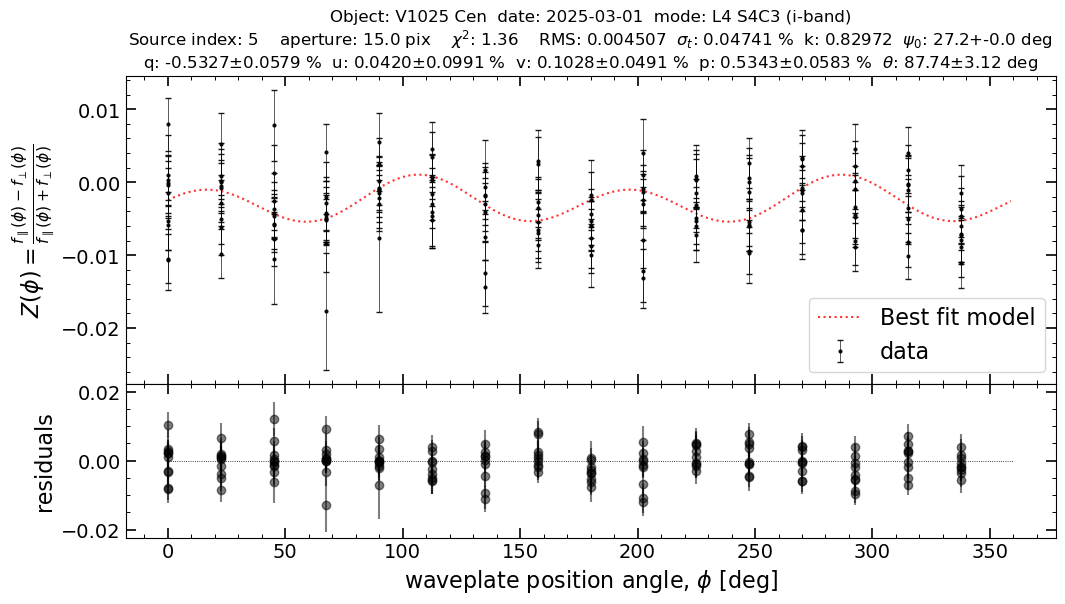

In [11]:
source_index = 5

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs3/20250228_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 5
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 149
MAG : -15.4129+-0.0003
RA : 189.56722313149572
DEC : -38.71267883406689
FWHM : 5.331607264185607
X1 : 456.5440971330991
Y1 : 644.7789523049777
X2 : 475.15582604429466
Y2 : 608.2369282166902
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180. 

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.53+-0.06 %  Angle of polarization: 88+-3 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

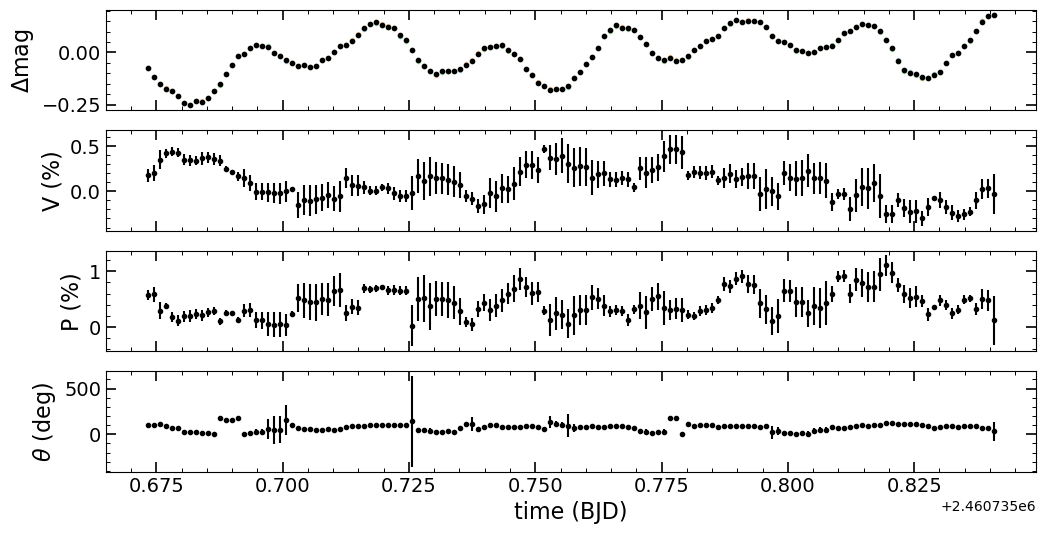

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.07432683391149908,0.0010564003297446197,-0.07345985603549288,0.0010863597700847365,-0.07439007189469837,0.001146864583452932,2460735.67341681,456.5440971330991,644.7789523049777,475.15582604429466,608.2369282166902,4.588507833362286,-12.141441092676377,0.0010023811153497245,-14.425100880903972,0.0007727573217333482,-0.07390138785065226,0.005728532423197964,0.0009821045821691377,99.96551115987263,4.903208880566491
-0.11854729070531178,0.001090533629963763,-0.11700702675640429,0.0011191599263553663,-0.11839997209443442,0.0011778868315016132,2460735.674602734,455.0440971330991,644.5289523049777,473.65582604429466,607.9869282166902,4.57171811536004,-12.098515361206612,0.0010384292512808538,-14.426121573592145,0.0007708397997764884,-0.11784781200858951,0.005833784254522623,0.0013229878255216379,102.99781391190747,6.485918943708876
-0.15107710569353117,0.0011146952072798879,-0.14916050024523564,0.0011426004609977089,-0.15039106318879636,0.0012002248407784744,2460735.675789723,455.2940971330991,645.0289523049777,473.90582604429466,608.4869282166902,4.57171811536004,-12.067180721556351,0.0010640912138202407,-14.427063616594697,0.0007692532437619901,-0.15012449466140332,0.0029404859649791943,0.0015804625279921202,108.67508846040836,15.372026542182276
-0.1740802232532932,0.0011326390785969388,-0.17216542451755323,0.0011600515751144678,-0.17358061067515163,0.0012169861403084367,2460735.676974657,455.5440971330991,644.5289523049777,474.15582604429466,607.9869282166902,4.596743084939048,-12.043768832429505,0.001082861936083406,-14.426699718660842,0.0007693349641985599,-0.17317248585439415,0.003791453544490036,0.0005848899686117304,85.30664133702089,4.411989466837961
-0.1847456585212317,0.0011419313057299623,-0.18283930500841272,0.0011689924716724073,-0.18429532800466664,0.0012253748502797446,2460735.6781603317,455.7940971330991,644.5289523049777,474.40582604429466,607.9869282166902,4.596743084939048,-12.033966718098934,0.0010925959891607787,-14.427577552885698,0.0007686325799368288,-0.18385243440982002,0.0017774427889613667,0.0008966396454289122,67.03834638912315,14.427408869937063
-0.2114099506991085,0.0011661158721124538,-0.20922253758764242,0.001192803132829369,-0.21074032794761255,0.001248184175451576,2460735.6793471063,455.5440971330991,644.5289523049777,474.15582604429466,607.9869282166902,4.6349865268169825,-12.007712560067256,0.0011177850820976646,-14.427842128141432,0.0007695705344200933,-0.2103711676972324,0.0011319487127207412,0.0009483254342547788,62.937554026977125,23.96054442651932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.002157891796388256,0.001323595247266447,-0.00259262589392506,0.0013665441955789705,-0.004662344673357133,0.0014530588596966515,2460735.833624853,456.2940971330991,643.5289523049777,474.90582604429466,606.9869282166902,6.1281995713997235,-12.143416068282917,0.0012564739408565842,-14.355920362090256,0.000997269860491537,-0.0027458934303954408,0.0031147934432474724,0.0008624733117422264,79.28207146393709,7.91922070123219
0.03109625775167757,0.0013373978337209683,0.02978237943730555,0.0013829635814948881,0.02864272522849287,0.001473543310985998,2460735.8348115394,456.2940971330991,643.5289523049777,474.90582604429466,606.9869282166902,6.140598364560834,-12.177426336117277,0.0012670158742497455,-14.356957101460672,0.0010278927210228424,0.03022763503354753,0.0049165949594438055,0.0007585795314180024,87.74902801017082,4.412682919279805


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=5, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)